<a href="https://colab.research.google.com/github/imabelaus/DP_Coursework1/blob/master/Time_series_dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pmdarima

     |████████████████████████████████| 1.1MB 5.0MB/s 


The main coding structure and approach was based on the following site https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

This was readapted and explained to the specific context of this dissertation.

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

df = pd.read_csv('/content/Time series dataset - Experiment (1).csv', names=['value'], header=0)

In [0]:
df.head()

,value
0,2
1,0
2,0
3,3
4,2


In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('p-value: %f' % result[1])
print('ADF Statistic: %f' % result[0])

ADF Statistic: 4.311433
p-value: 1.000000


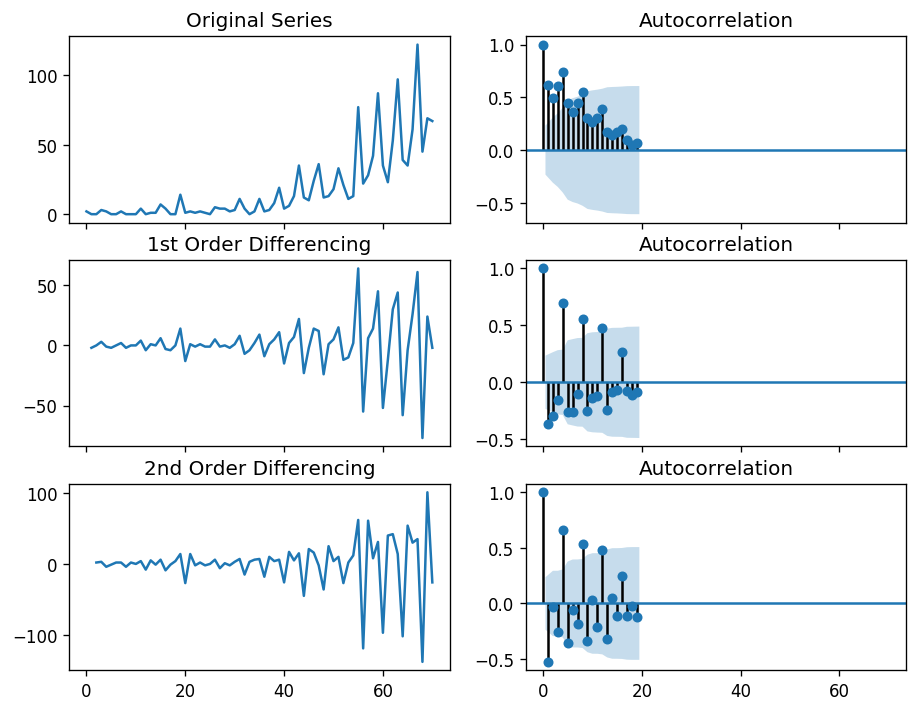

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


df = pd.read_csv('/content/Time series dataset - Experiment (1).csv', names=['value'], header=0)


fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])


axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])


axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


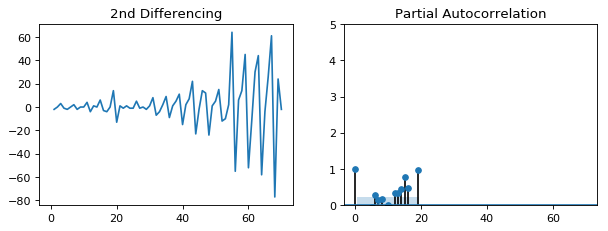

In [0]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':80})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('2nd Differencing')
axes[2].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

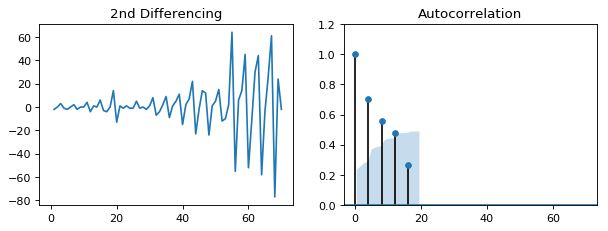

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('2nd Differencing')
axes[2].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.value, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   70
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -285.184
Method:                       css-mle   S.D. of innovations             14.040
Date:                Mon, 09 Sep 2019   AIC                            580.369
Time:                        17:57:27   BIC                            591.611
Sample:                             1   HQIC                           584.834
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0086      0.337      2.989      0.004       0.347       1.670
ar.L1.D.value    -0.2803      0.111     -2.536      0.014      -0.497      -0.064
ar.L2.D.value    -0.5035      0.105     

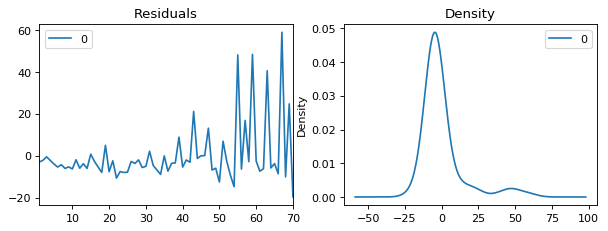

In [0]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

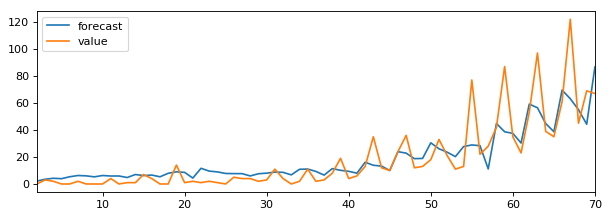

In [0]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
from statsmodels.tsa.stattools import acf

train = df.value[:60]
test = df.value[59:70]

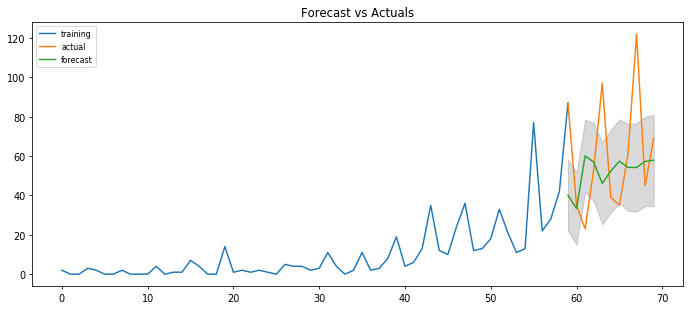

In [0]:

model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  


fc, se, conf = fitted.forecast(11, alpha=0.1)  # 95% conf


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -231.169
Method:                       css-mle   S.D. of innovations             12.074
Date:                Mon, 09 Sep 2019   AIC                            470.339
Time:                        17:58:07   BIC                            478.649
Sample:                             1   HQIC                           473.583
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8280      0.387      2.138      0.037       0.069       1.587
ar.L1.D.value    -0.0783      0.172     -0.456      0.650      -0.414       0.258
ma.L1.D.value    -0.7541      0.097     

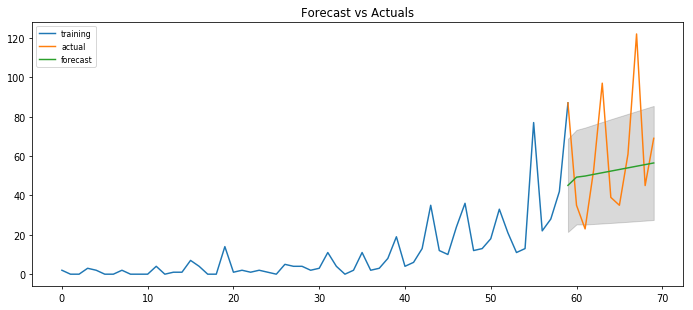

In [0]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -231.169
Method:                       css-mle   S.D. of innovations             12.074
Date:                Mon, 09 Sep 2019   AIC                            470.339
Time:                        18:03:09   BIC                            478.649
Sample:                             1   HQIC                           473.583
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8280      0.387      2.138      0.037       0.069       1.587
ar.L1.D.value    -0.0783      0.172     -0.456      0.650      -0.414       0.258
ma.L1.D.value    -0.7541      0.097     

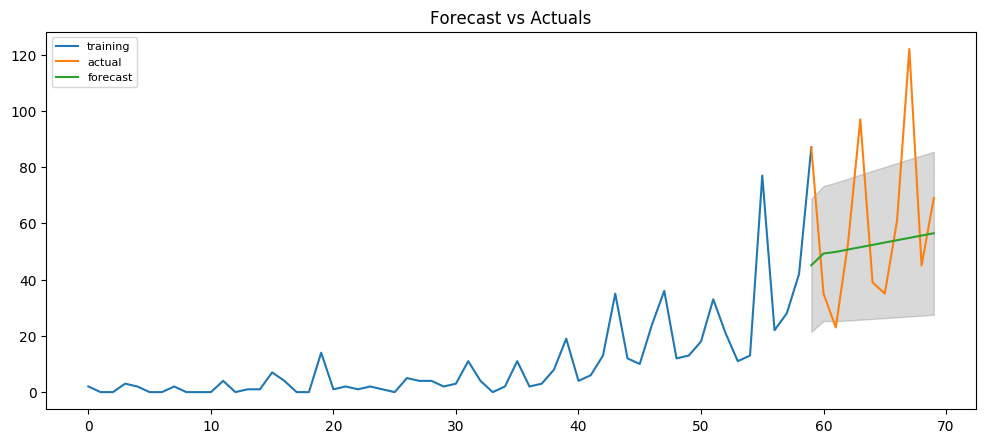

In [0]:

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
  
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
  
    return({'rmse':rmse})

forecast_accuracy(fc, test.values)

{'rmse': 30.290729784714063}

In [0]:
fc = model.predict(n_periods=12)

In [0]:
fc

array([67.13875436, 68.13077966, 69.12280496, 70.11483026, 71.10685556,
       72.09888086, 73.09090617, 74.08293147, 75.07495677, 76.06698207,
       77.05900737, 78.05103267])

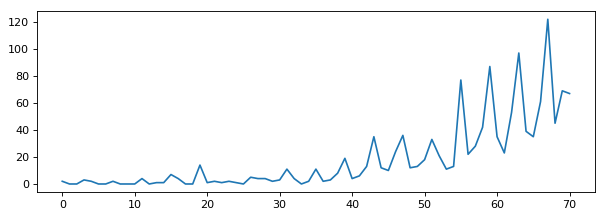

In [0]:
plt.plot(df.value)

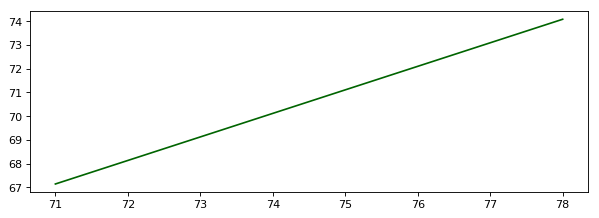

In [0]:
plt.plot(fc_series, color='darkgreen')

In [0]:
df.max()

value    122
dtype: int64

In [0]:
df.mean()

value    18.140845
dtype: float64